#Importing the referances and Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler,LabelBinarizer,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict,cross_validate,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA,KernelPCA,SparsePCA,IncrementalPCA,MiniBatchSparsePCA
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor


#1. Carbon (%C)
Role: Carbon is the most critical element in steel, primarily influencing its hardness and strength.
Effect:
Increases hardness and tensile strength.
Reduces ductility and toughness at high concentrations.
Increases wear resistance.
Too much carbon can make steel brittle and difficult to weld.


#2. Silicon (%Si)
Role: Silicon acts as a deoxidizer and improves strength.
Effect:
Increases yield strength and hardness.
Improves resistance to oxidation.
Enhances magnetic properties in electrical steels.
Excessive silicon can make steel brittle.


#3. Manganese (%Mn)
Role: Manganese improves steel’s hardenability and strength.
Effect:
Increases tensile strength and impact resistance.
Enhances wear resistance.
Improves hardenability by reducing the formation of brittle phases.
Prevents sulfur embrittlement by forming MnS.


#4. Phosphorus (%P)
Role: Phosphorus is added in controlled amounts to improve strength and corrosion resistance.
Effect:
Increases strength and hardness.
Improves machinability.
Excess phosphorus makes steel brittle and reduces toughness.


#5. Sulfur (%S)
Role: Sulfur is typically an impurity but is added to improve machinability in free-cutting steels.
Effect:
Enhances machinability.
Reduces ductility and impact toughness.
Can cause hot shortness (brittleness at high temperatures) if not controlled.


#6. Nickel (%Ni)
Role: Nickel increases toughness and corrosion resistance.
Effect:
Improves toughness, especially at low temperatures.
Enhances strength and hardenability.
Improves corrosion resistance, especially in stainless steels.


#7. Chromium (%Cr)
Role: Chromium enhances hardness, wear resistance, and corrosion resistance.
Effect:
Increases hardness and strength, especially after heat treatment.
Improves wear and oxidation resistance.
Forms a protective oxide layer, making steel corrosion-resistant.
Essential in stainless steel (>10.5% Cr).


#8. Copper (%Cu)
Role: Copper improves corrosion resistance.
Effect:
Increases resistance to atmospheric corrosion.
Improves strength without losing ductility.
Can cause surface cracking in high amounts.


#9. Molybdenum (%Mo)
Role: Molybdenum enhances strength, hardenability, and creep resistance.
Effect:
Improves high-temperature strength.
Enhances hardenability and prevents softening at elevated temperatures.
Reduces brittleness and improves corrosion resistance.

##1. Chemical Composition and Its Role
These elements affect the steel’s hardness, strength, toughness, and fatigue resistance:

%C (Carbon): Increases hardness and strength but reduces ductility. Key for hardening steel.
%Si (Silicon): Strengthens steel and improves oxidation resistance.
%Mn (Manganese): Improves hardenability, toughness, and wear resistance.
%P (Phosphorus): Enhances strength and machinability but excess can cause brittleness.
%S (Sulfur): Improves machinability but reduces toughness.
%Ni (Nickel): Increases toughness, strength, and corrosion resistance.
%Cr (Chromium): Enhances wear resistance, hardenability, and corrosion resistance.
%Cu (Copper): Improves corrosion resistance.
%Mo (Molybdenum): Enhances hardenability and high-temperature strength.


##2. Heat Treatment Parameters
These parameters define how the steel is processed to achieve desired mechanical properties:

NT (Normalizing Temperature): Temperature at which steel is heated and then air-cooled to refine grain structure and improve toughness.
THT (Through Hardening Temperature): Temperature for austenitization before quenching to achieve full hardness.
THt (Through Hardening Time): Duration for which the steel is held at the hardening temperature.
THQCr (Cooling Rate for Through Hardening): Speed at which steel is cooled after hardening; affects final hardness and microstructure.
CT (Carburization Temperature): Temperature at which carbon is diffused into the steel surface to increase surface hardness.
Ct (Carburization Time): Duration of carburization, affecting case depth.
DT (Diffusion Temperature): Temperature at which carbon is evenly distributed within the steel.
Dt (Diffusion Time): Time required for carbon to distribute uniformly in the steel.
QmT (Quenching Media Temperature for Carburization): Temperature of the quenching medium (oil, water, or gas) used after carburization.
TT (Tempering Temperature): Temperature used to relieve stresses and adjust hardness after quenching.
Tt (Tempering Time): Duration of tempering, which affects the final mechanical properties.
TCr (Cooling Rate for Tempering): Speed at which steel is cooled after tempering, influencing final toughness.


##3. Mechanical and Structural Properties
These parameters describe how steel is shaped and its inclusion content, which impacts fatigue strength:

RedRatio (Reduction Ratio): Ratio of initial ingot size to final bar size, indicating plastic deformation amount, which influences toughness and fatigue resistance.
dA (Area Proportion of Inclusions Deformed by Plastic Work): Percentage of inclusions elongated during hot working, affecting fatigue life.
dB (Area Proportion of Inclusions Occurring in Discontinuous Array): Measures non-uniformly distributed inclusions, which can reduce fatigue strength.
dC (Area Proportion of Isolated Inclusions): Represents isolated inclusions, which have a lower impact on mechanical properties compared to clustered inclusions.
Fatigue (Rotating Bending Fatigue Strength at 10⁷ Cycles): The endurance limit of the steel, indicating its ability to resist fatigue failure under cyclic loading.

#Importing the dataset.

In [25]:
df=pd.read_csv("data.csv")

#Exploratory Data Analysis & Data Cleaning.

In [26]:
df.head()

,Sl. No.,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
0,1,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.01,0.0,825,0.07,0.02,0.04,232
1,2,885,30,0,0,30,0.0,30.0,0.0,30,...,0.017,0.08,0.12,0.08,0.0,610,0.11,0.00,0.04,235
2,3,885,30,0,0,30,0.0,30.0,0.0,30,...,0.015,0.02,0.03,0.01,0.0,1270,0.07,0.02,0.00,235
3,4,885,30,0,0,30,0.0,30.0,0.0,30,...,0.024,0.01,0.02,0.01,0.0,1740,0.06,0.00,0.00,241
4,5,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.02,0.0,825,0.04,0.02,0.00,225


In [27]:
#Dropping out the SL.No column as of no use.
df=df.drop('Sl. No.',axis=1)

In [28]:
#Getting the shape of DataSet.
df.shape

(437, 26)

In [29]:
#Checking the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NT        437 non-null    int64  
 1   THT       437 non-null    int64  
 2   THt       437 non-null    int64  
 3   THQCr     437 non-null    int64  
 4   CT        437 non-null    int64  
 5   Ct        437 non-null    float64
 6   DT        437 non-null    float64
 7   Dt        437 non-null    float64
 8   QmT       437 non-null    int64  
 9   TT        437 non-null    int64  
 10  Tt        437 non-null    int64  
 11  TCr       437 non-null    float64
 12  C         437 non-null    float64
 13  Si        437 non-null    float64
 14  Mn        437 non-null    float64
 15  P         437 non-null    float64
 16  S         437 non-null    float64
 17  Ni        437 non-null    float64
 18  Cr        437 non-null    float64
 19  Cu        437 non-null    float64
 20  Mo        437 non-null    float6

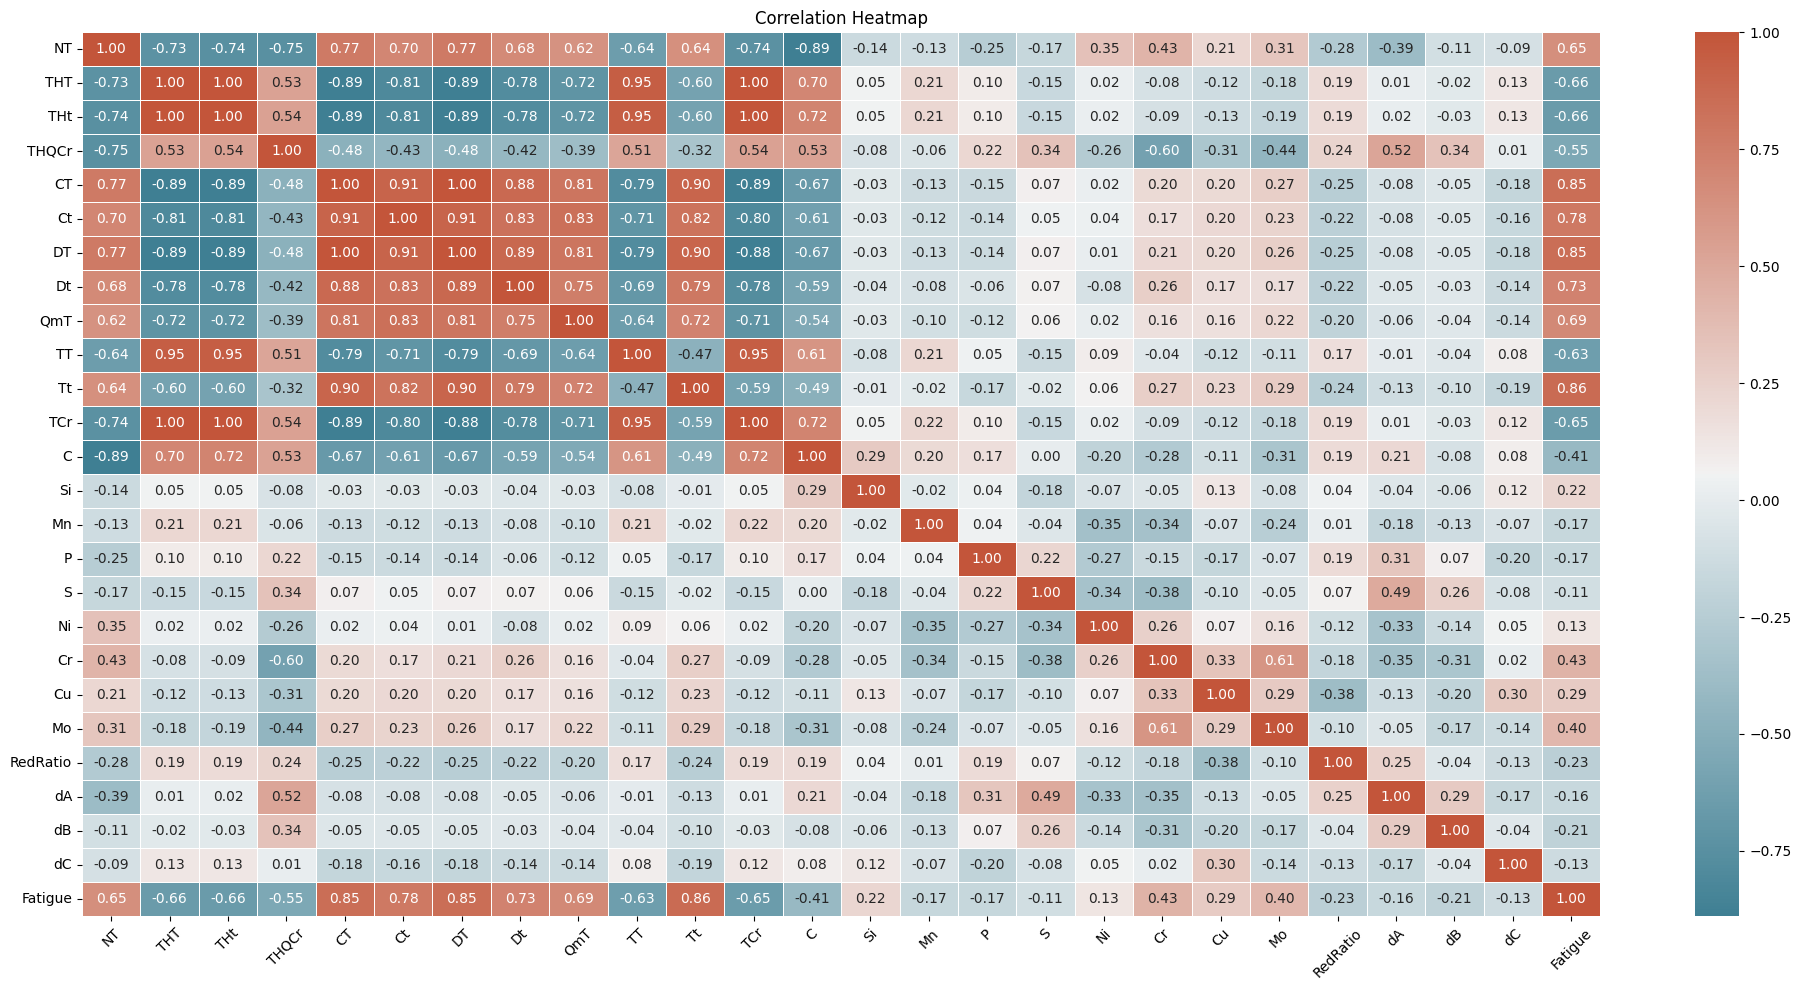

In [30]:
correlation = df.corr()
plt.figure(figsize=(20, 10))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlation, annot=True, cmap=cmap, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [9]:
#Looking for any null value
df.isnull().sum()

NT          0
THT         0
THt         0
THQCr       0
CT          0
Ct          0
DT          0
Dt          0
QmT         0
TT          0
Tt          0
TCr         0
C           0
Si          0
Mn          0
P           0
S           0
Ni          0
Cr          0
Cu          0
Mo          0
RedRatio    0
dA          0
dB          0
dC          0
Fatigue     0
dtype: int64

In [10]:
#Looking for duplicated row
df.duplicated().sum()

np.int64(0)

In [11]:
#Descriptive statics analysis
df.describe()

,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,TT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
count,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,...,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,872.299771,737.643021,25.949657,10.654462,128.855835,40.502059,123.699844,4.843936,35.491991,536.842105,...,0.014611,0.517048,0.570458,0.067780,0.069794,923.629291,0.047181,0.003391,0.007712,552.903890
std,26.212073,280.036541,10.263824,7.841437,281.743539,126.924697,267.128933,15.700076,19.419277,164.101963,...,0.006145,0.852976,0.411769,0.049161,0.088124,576.617020,0.031093,0.008240,0.010418,186.630528
min,825.000000,30.000000,0.000000,0.000000,30.000000,0.000000,30.000000,0.000000,30.000000,30.000000,...,0.003000,0.010000,0.010000,0.010000,0.000000,240.000000,0.000000,0.000000,0.000000,225.000000
25%,865.000000,845.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,550.000000,...,0.010000,0.020000,0.120000,0.020000,0.000000,590.000000,0.020000,0.000000,0.000000,448.000000
50%,870.000000,845.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,600.000000,...,0.015000,0.060000,0.710000,0.060000,0.000000,740.000000,0.040000,0.000000,0.000000,505.000000
75%,870.000000,855.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,650.000000,...,0.019000,0.460000,0.980000,0.100000,0.170000,1228.000000,0.070000,0.000000,0.010000,578.000000
max,930.000000,865.000000,30.000000,24.000000,930.000000,540.000000,903.333000,70.200000,140.000000,680.000000,...,0.030000,2.780000,1.170000,0.260000,0.240000,5530.000000,0.130000,0.050000,0.058000,1190.000000


In [13]:
correlation=df.corr()

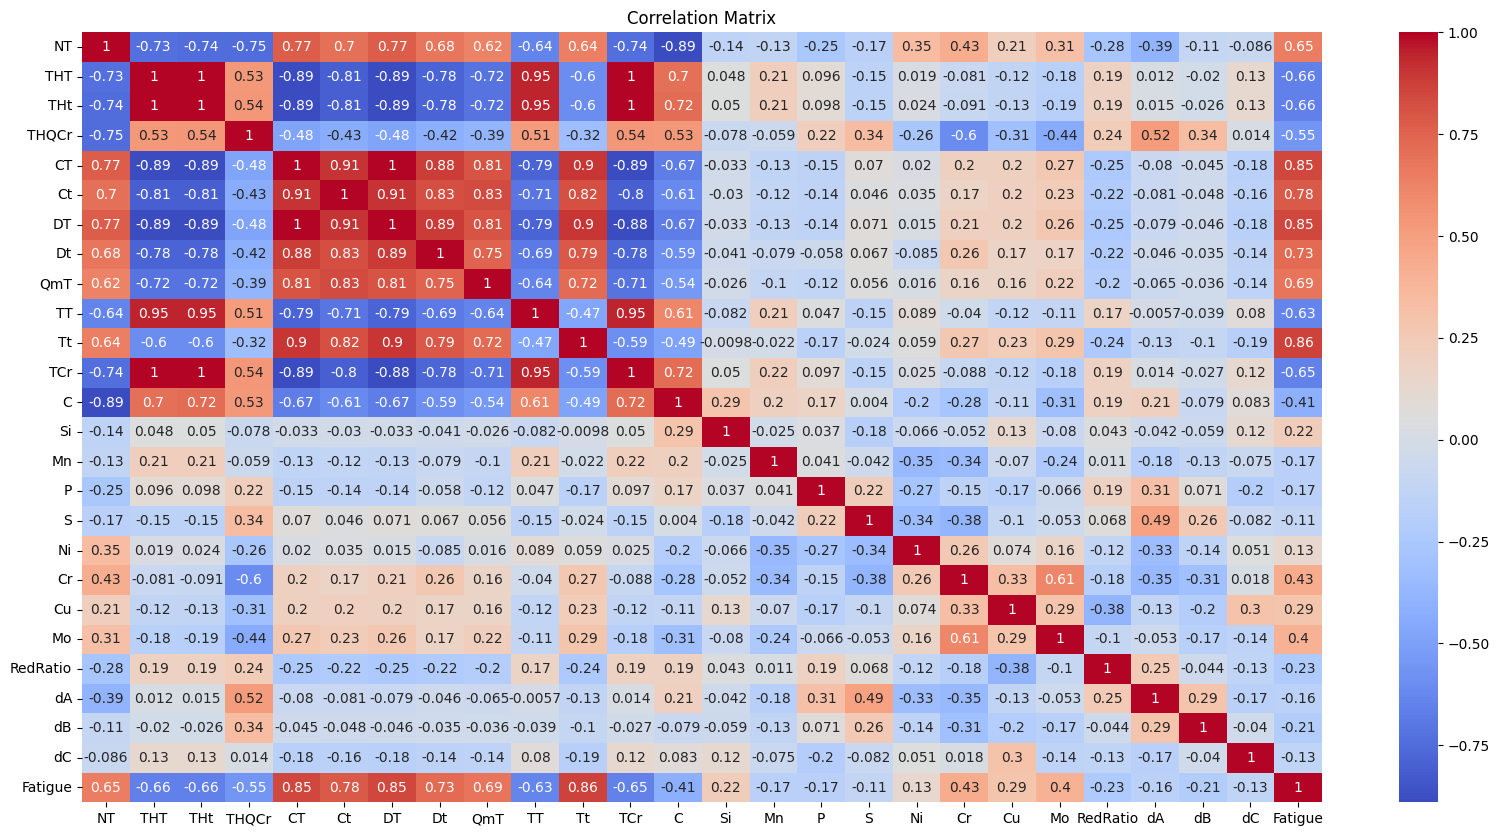

In [14]:
plt.figure(plt.figure(figsize=(20,10)))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#One class SVM

In [18]:
scaler_3=RobustScaler()

In [31]:
x=df.drop('Fatigue',axis=1)
y=df['Fatigue']

In [32]:
x

,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,TT,...,P,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC
0,885,30,0,0,30,0.0,30.000,0.0,30,30,...,0.017,0.022,0.01,0.02,0.01,0.00,825,0.070,0.020,0.040
1,885,30,0,0,30,0.0,30.000,0.0,30,30,...,0.009,0.017,0.08,0.12,0.08,0.00,610,0.110,0.000,0.040
2,885,30,0,0,30,0.0,30.000,0.0,30,30,...,0.008,0.015,0.02,0.03,0.01,0.00,1270,0.070,0.020,0.000
3,885,30,0,0,30,0.0,30.000,0.0,30,30,...,0.018,0.024,0.01,0.02,0.01,0.00,1740,0.060,0.000,0.000
4,885,30,0,0,30,0.0,30.000,0.0,30,30,...,0.026,0.022,0.01,0.02,0.02,0.00,825,0.040,0.020,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,930,30,0,0,930,340.2,895.812,70.2,140,160,...,0.015,0.024,0.02,0.91,0.01,0.15,240,0.050,0.010,0.000
433,930,30,0,0,930,340.2,895.812,70.2,140,160,...,0.016,0.015,0.07,1.08,0.08,0.15,530,0.017,0.004,0.008
434,930,30,0,0,930,340.2,895.812,70.2,60,200,...,0.012,0.019,0.06,1.17,0.07,0.17,690,0.080,0.000,0.000
435,930,30,0,0,930,340.2,895.812,70.2,60,200,...,0.015,0.024,0.02,0.91,0.01,0.15,240,0.050,0.010,0.000


In [33]:
y

0       232
1       235
2       235
3       241
4       225
       ... 
432    1030
433     957
434    1104
435    1008
436     882
Name: Fatigue, Length: 437, dtype: int64

In [87]:
x_test,x_train,y_test,y_train=train_test_split(x,y,random_state=42,train_size=50)

In [88]:
x_train_scaled=scaler_3.fit_transform(x_train)

In [90]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)

In [91]:
x_test_scaled=scaler_3.fit_transform(x_test)

In [92]:
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [93]:
model=LinearRegression()

In [94]:
model.fit(x_train_scaled,y_train)

LinearRegression()

In [95]:
y_pred_tr=model.predict(x_train_scaled)

In [96]:
y_pred_ts=model.predict(x_test_scaled)

#Checking the accuracy on all the 3 scalers.

In [82]:
from sklearn.metrics import r2_score

In [97]:
accuracy_train=r2_score(y_train,y_pred_tr)

In [98]:
accuracy_test=r2_score(y_test,y_pred_ts)

In [99]:
accuracy_train

0.9750331420970471

In [100]:
accuracy_test

0.539895302910766

#Now Here i am testing the approach first scale than split.

In [102]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    
}

# Create the grid search object
model = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_absolute_error',  # Using negative MAE as scoring metric
                           cv=5,  # 5-fold cross-validation
                           verbose=1,  # Print progress
                           n_jobs=-1)  # Use all available CPU cores

# Fit the grid search to the data
model.fit(x_train_scaled, y_train)

# Get the best parameters and the best score
best_params = model.best_params_
best_score = -model.best_score_

print("Best Parameters:", best_params)
print("Best Negative MAE:", best_score)

# Evaluate the best model on the test set
best_model = model.best_estimator_
y_pred_ts = best_model.predict(x_test_scaled)
y_pred_tr = best_model.predict(x_train_scaled)
test_acc = r2_score(y_test, y_pred_ts)
train_acc=r2_score(y_train, y_pred_tr)
print("Test ACC:", test_acc)
print("TRAIN ACC:", train_acc)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Negative MAE: 22.266531315217335
Test ACC: 0.9328295942526349
TRAIN ACC: 0.9911177087757931


#Model_4 random forest

In [106]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 20, 30],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor,
                           param_grid=param_grid,
                           scoring='neg_mean_absolute_error',  # Using negative MAE as scoring metric
                           cv=5,  # 5-fold cross-validation
                           verbose=1,  # Print progress
                           n_jobs=-1)  # Use all available CPU cores

# Fit the grid search to the training data
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Negative MAE:", best_score)
# Evaluate the best model on the test set
best_model = model.best_estimator_
y_pred_ts = best_model.predict(x_test_scaled)
y_pred_tr = best_model.predict(x_train_scaled)
test_acc = r2_score(y_test, y_pred_ts)
train_acc=r2_score(y_train, y_pred_tr)
print("Test ACC:", test_acc)
print("TRAIN ACC:", train_acc)



Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 30}
Best Negative MAE: 19.649702568395217
Test ACC: 0.9328295942526349
TRAIN ACC: 0.9911177087757931
